In [91]:
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns
sns.set(style="ticks", palette="muted")

In [128]:
# hidden probabilities
means = np.array([0.3, 0.6, 0.5])


rnd = np.random.RandomState(7)

## Greedy Algorithm

In [129]:
def pull_lever(machine, means, S, F):
    # draw uniform random sample
    p = rnd.random_sample()
    if p < means[machine]:
        S[machine] += 1
    else:
        F[machine] += 1
        

In [130]:
def greedy_algorithm(num_trials, means):
    """Greedy algorithm"""

    N = len(means)
    
    # current probabilities
    probs = np.zeros(N)

    # number of successes for each machine
    S = np.zeros(N, dtype=np.int)

    # number of failures for each machine
    F = np.zeros(N, dtype=np.int)

    for trial in range(num_trials):
        for i in range(N):
            probs[i] = (S[i] + 1)/(S[i] + F[i] + 1)
            
        # choose the most likely machine
        machine = np.argmax(probs)
        pull_lever(machine, means, S, F)
        
    return S, F

In [131]:
def e_greedy_algorithm(num_trials, means, epsilon= 0.0):
    """Greedy algorithm"""

    # current probabilities
    probs = np.zeros(N)

    # number of successes for each machine
    S = np.zeros(N, dtype=np.int)

    # number of failures for each machine
    F = np.zeros(N, dtype=np.int)

    for trial in range(num_trials):

        p = rnd.random_sample()
    
        for i in range(N):
            probs[i] = (S[i] + 1)/(S[i] + F[i] + 1)
            
        # epsilon number of times choose a random machine
        if p < epsilon:
            machine = rnd.randint(0, N)
            
        machine = np.argmax(probs)
        pull_lever(machine, means, S, F)
        
    return S, F

In [137]:
means = np.array([0.3, 0.6, 0.5])

num_trials = 100

print(greedy_algorithm(num_trials, means))

print(e_greedy_algorithm(num_trials, means, 0.1))

print(thompson_algorithm(num_trials, means))

(array([ 0, 57,  1]), array([ 1, 39,  2]))
(array([ 4, 60,  0]), array([ 5, 30,  1]))
(array([ 2, 35, 17]), array([ 6, 27, 13]))


## Thompson sampling

In [120]:
def thompson_algorithm(num_trials, means):
    """Greedy algorithm"""

    N = len(means)
    
    # current probabilities
    probs = np.zeros(N)

    # number of successes for each machine
    S = np.zeros(N, dtype=np.int)

    # number of failures for each machine
    F = np.zeros(N, dtype=np.int)

    for trial in range(num_trials):
        for i in range(N):
            probs[i] = rnd.beta(S[i]+1, F[i]+1)
            
        # choose the most likely machine
        machine = np.argmax(probs)
        pull_lever(machine, means, S, F)
        
    return S, F

In [98]:
num_trials = 100

total_wins = 0

# number of wins at each trial number
wins = np.zeros(num_trials)

for trial in range(num_trials):
    print("Trial {}".format(trial))
    for i in range(N):
        
        # draw from random sample
        probs[i] = rnd.beta(S[i]+1, F[i]+1)
        
    print(probs)
    machine = np.argmax(probs)
    print("Playing machine {}".format(machine))
    
    # draw from a random uniform distribution
    p = rnd.random_sample()
    if p < means[machine]:
        print(" -- win!")
        S[machine] += 1
        total_wins += 1
    else:
        print(" -- lose")
        F[machine] += 1
        
    wins[trial] = (total_wins)/(trial+1)
        
print("Total wins {}".format(total_wins))

Trial 0
[0.15196823 0.76450082 0.51878449]
Playing machine 1
 -- win!
Trial 1
[0.37934948 0.79105019 0.55670254]
Playing machine 1
 -- win!
Trial 2
[0.28420803 0.79867528 0.56569753]
Playing machine 1
 -- win!
Trial 3
[0.03912707 0.79371196 0.54687472]
Playing machine 1
 -- win!
Trial 4
[0.16628528 0.78966384 0.52681542]
Playing machine 1
 -- win!
Trial 5
[0.3849752  0.80003849 0.64521113]
Playing machine 1
 -- lose
Trial 6
[0.13347795 0.80168545 0.38193085]
Playing machine 1
 -- win!
Trial 7
[0.24102726 0.80128518 0.53728734]
Playing machine 1
 -- lose
Trial 8
[0.05588245 0.79660614 0.50006423]
Playing machine 1
 -- lose
Trial 9
[0.15255617 0.80761533 0.64459226]
Playing machine 1
 -- win!
Trial 10
[0.15083757 0.78190622 0.69289922]
Playing machine 1
 -- win!
Trial 11
[0.05963437 0.79996349 0.57245384]
Playing machine 1
 -- win!
Trial 12
[0.31953258 0.7861156  0.68712467]
Playing machine 1
 -- lose
Trial 13
[0.05460956 0.78355469 0.61692149]
Playing machine 1
 -- win!
Trial 14
[0.0027

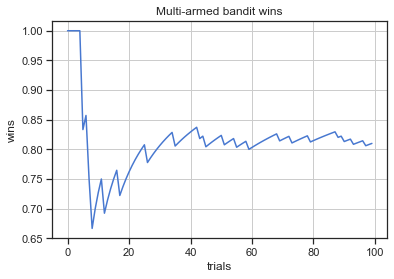

In [99]:
fig, ax = plt.subplots()
ax.plot(wins)

ax.set(xlabel='trials', ylabel='wins',
       title='Multi-armed bandit wins')
ax.grid()

# fig.savefig("test.png")
plt.show()

In [100]:
print(probs)

[0.28486186 0.80238725 0.69243404]


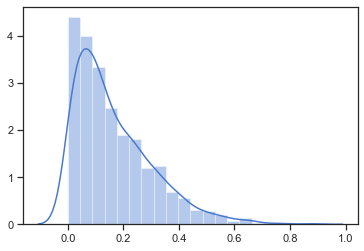

In [101]:
data = [np.random.beta(x+1, y+1, 1000) for x, y, in zip(S, F)]

sns.distplot(data[0], bins=20, kde=True)

In [102]:

# sns.set(color_codes=True)
# sns.set_context('paper')  #Everything is larger


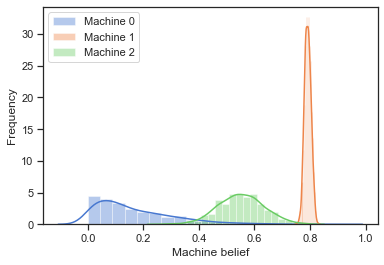

In [103]:
for i in range(N):
    ax = sns.distplot(data[i],
                     bins=20,
                     kde=True,
                     label='Machine {}'.format(i),
                     )


ax.set(xlabel='Machine belief', ylabel='Frequency')
ax.legend()
plt.savefig('foo.svg')